In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
cov_matrix = np.cov(X_scaled.T)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen values:\n', eigenvalues)
print('Eigen vectors:\n', eigenvectors)

Eigen values:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen vectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [6]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [7]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print('Explained variance:\n', explained_var)

Explained variance:
 [0.72962445 0.95813207 0.99482129 1.        ]


In [8]:
n_components = np.argmax(explained_var >= 0.95) + 1
print('Number of components to explain at least 95% variance:', n_components)

Number of components to explain at least 95% variance: 2


In [9]:
pca_components = eigenvectors[:, :n_components]
pca_component_matrix = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components)])
print('PCA Component Matrix:\n', pca_component_matrix)

PCA Component Matrix:
         PC1       PC2
0  0.521066 -0.377418
1 -0.269347 -0.923296
2  0.580413 -0.024492
3  0.564857 -0.066942


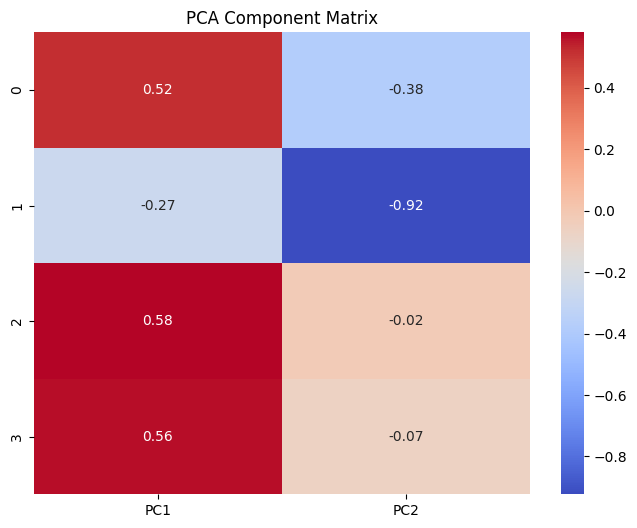

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(pca_component_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Component Matrix')
plt.show()

In [11]:
Z_pca = X_scaled @ pca_components

Z_pca_df = pd.DataFrame(Z_pca, columns=[f'PCA{i+1}' for i in range(n_components)])
print('Transformed DataFrame:\n', Z_pca_df)

Transformed DataFrame:
          PCA1      PCA2
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]


In [12]:
pca_sklearn = PCA(n_components=n_components)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)
print('PCA using scikit-learn:\n', X_pca_sklearn)

PCA using scikit-learn:
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-